## Treatment T10 Preparation

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

np.random.seed = 0

#df = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_train.xls")

df = pd.read_excel("../data/t00/data.xls")
df_full = df.copy()
#Drop 'protected' features
drop_cols = ['prop', 'other_prop', 'other_resp']
df = df[[col for col in df.columns if col not in drop_cols]]

## comment/uncomment for shuffling
#df = df.sample(frac=1.0)
TEST_SIZE = 50
# df_test = df.head(TEST_SIZE)
# df_train = df.tail(df.shape[0] - TEST_SIZE)
df_base = df.copy()

df_train = df.head(df.shape[0] - TEST_SIZE)
df_test = df.tail(TEST_SIZE)


df_full = pd.read_excel("../data/t00/data.xls")
df_min = df_full.min()
df_max = df_full.max()
df_max["Honesty_Humility"] = 5.0
df_max["Extraversion"] = 5.0
df_max["Agreeableness"] = 5.0
df_max["cells"] = 50
df_max["selfish"] = 60
df_max["min_offer"] = 200
df_max["prop"] = 200
df_max["other_resp"] = 200
df_max["other_prop"] = 200


df.head()
df_max

prop                   200.0
other_resp             200.0
other_prop             200.0
time_spent_risk     152000.0
cells                   50.0
selfish                 60.0
time_spent_prop     269000.0
count_effort            20.0
Honesty_Humility         5.0
Extraversion             5.0
Agreeableness            5.0
min_offer              200.0
dtype: float64

## Determine significant features

**Feature importance permutation**

In [2]:
from core.utils.preprocessing import df_to_xy, df_to_xydf
from core.models import AcceptanceModel
from core.utils.benchmark import process_model, process_benchmark_cv
# from mlxtend.evaluate import feature_importance_permutation

In [3]:
# from utils.preprocessing import df_to_xy, df_to_xydf

# NB_REPETITIONS = 5

# imp_vals = None
# imp_all = None
# for _ in range(NB_REPETITIONS):
#     df_x, df_y = df_to_xydf(df_train.sample(frac=1.0), fuse_risk=True)
#     model = AcceptanceModel()
#     split = int(0.6 * df_x.shape[0])
#     model.fit(df_x.values[:split], df_y.values.ravel()[:split])

#     step_imp_vals, step_imp_all = feature_importance_permutation(
#         predict_method=model.predict, 
#         X=df_x.values[split:],
#         y=df_y.values.ravel()[split:],
#         metric='accuracy',
#         num_rounds=3,
#         seed=None)
#     if imp_vals is None:
#         imp_vals = step_imp_vals
#         imp_all = step_imp_all
#     else:
#         imp_vals += step_imp_vals
#         imp_all += step_imp_all


# imp_all /= NB_REPETITIONS
# imp_vals /= NB_REPETITIONS
# std = np.std(imp_all, axis=1)
# indices = np.argsort(imp_vals)[::-1]


# plt.figure(figsize=(15, 8))
# plt.title("Feature importance via permutation importance")
# plt.bar(df_x.columns[indices], imp_vals[indices],
#         yerr=std[indices],)
# plt.show()

In [4]:
# res = {}
# features = list(df) + ['risk']
# if 'min_offer' in features:
#     features.remove('min_offer')
# for col in features:
#     df_train = df_train.sample(frac=1.0)
#     if col == 'risk':    
#         x, y = df_to_xy(df_base, select_columns=[col], fuse_risk=True, df_min=df_min, df_max=df_max)
#         col = 'risk*'
#     else:
#         x, y = df_to_xy(df_base, select_columns=[col], df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y)
#     res[col] = item_res.mean()

# res_single_df = pd.DataFrame(res).T
# res_single_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_single_df

In [5]:
# from itertools import combinations


# features = list(df_train) + ["risk"]
# if 'min_offer' in features:
#     features.remove('min_offer')

# res = {}
# for cols in combinations(features, 2):
#     df_train = df_train.sample(frac=1.0)
#     #index should be a list
#     cols = list(cols)
#     if cols[0]==cols[1]: continue
#     if "risk" in cols and ("time_spent_risk" in cols or "cells" in cols): continue
#     if "risk" in cols:
#         x, y = df_to_xy(df_base, centered=False, fuse_risk=True, select_columns=cols, df_min=df_min, df_max=df_max)
#     else:
#         x, y = df_to_xy(df_base, centered=False, select_columns=cols, df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y)
#     res[":".join(cols)] = item_res.mean()

# res_duo_df = pd.DataFrame(res).T
# res_duo_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_duo_df.head(10)

In [6]:
# from itertools import combinations

#res_trio_df = res_duo_df

# features = list(df_train)
# if 'min_offer' in features:
#     features.remove('min_offer')

# res = {}
# for cols in combinations(features, 3):
#     df_train = df_train.sample(frac=1.0)
#     #index should be a list
#     cols = list(cols)
#     if cols[0]==cols[1]: continue
#     x, y = df_to_xy(df_base, centered=False, select_columns=cols, df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y, cv=3)
#     res[":".join(cols)] = item_res.mean()

# res_trio_df = pd.DataFrame(res).T
# res_trio_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_trio_df.head(10)

In [7]:
# from itertools import combinations


# features = list(df)
# if 'min_offer' in features:
#     features.remove('min_offer')

# res = {}
# for cols in combinations(features, 4):
#     #index should be a list
#     cols = list(cols)
#     if cols[0]==cols[1]: continue
#     x, y = df_to_xy(df, centered=False, select_columns=cols, df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y)
#     res[":".join(cols)] = item_res.mean()

# res_quad_df = pd.DataFrame(res).T
# res_quad_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_quad_df.head(10)

## Train model with top features

In [8]:
#top_columns = ['time_spent_prop', 'count_effort']

#top_columns = ['time_spent_prop', 'count_effort', 'selfish', 'Honesty_Humility']

top_columns = ['selfish', 'cells', 'count_effort', 'Honesty_Humility']
#top_columns = ["risk", "time_spent_prop"]
epsilon = 0.01
# if res_duo_df.avg_loss_ratio[0] - epsilon < res_trio_df.avg_loss_ratio[0]:
#     top_columns = res_duo_df.index[0].split(':')
# else:
#     top_columns = res_trio_df.index[0].split(':')
# # if res_single_df.avg_loss_ratio[0] - epsilon < res_duo_df.avg_loss_ratio[0] and \
# #         res_single_df.avg_loss_ratio[0] - epsilon < res_trio_df.avg_loss_ratio[0]:
# #     top_columns = [res_single_df.index[0]]

if "risk" in top_columns:
    x, y = df_to_xy(df_train, centered=False, fuse_risk=True, select_columns=top_columns, min_target=5, max_target=190, df_min=df_min, df_max=df_max)
else:
    x, y = df_to_xy(df_train, centered=False, select_columns=top_columns, min_target=5, max_target=190, df_min=df_min, df_max=df_max)


In [9]:
split = int(x.shape[0] * 0.8)
xTrain, yTrain = x[:split], y[:split]
xTest, yTest = x[split:], y[split:]


In [10]:
model = AcceptanceModel(step=5, zero_one=False)

In [11]:
from core.models.metrics import gain_mean, avg_loss_ratio

model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

print("Train AVG loss ratio: ", avg_loss_ratio(yTrain, model.predict(xTrain)))

print("Val Mean gain: ", gain_mean(yTest, yPred))
print("Val AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

Train AVG loss ratio:  0.27316667500817604
Val Mean gain:  89.6819526627219
Val AVG loss ratio:  0.2477196992530195


/home/franck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print("Unique values: ", np.unique(yTest))
print("Unique predicted values: ", np.unique(yPred))

Unique values:  [  5  10  25  50  55  75  80  90  95 100 150]
Unique predicted values:  [100. 105. 110.]




## Generate data for the survey

In [13]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier


top_model = AcceptanceModel.get_trained_model(xTrain, yTrain)

top_loss_ratio = avg_loss_ratio(yTrain, top_model.predict(xTrain))

print("top acc:", 1 - top_loss_ratio,)   # "Val acc: ", avg_loss_ratio(yTest, top_model.predict(xTest)))


/home/franck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/franck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/franck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/franck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

top acc: 0.7373267567599268


In [14]:
# Read and sanitize the data
df_train = df.head(df.shape[0] - 100)
#df_test = df.tail(100)
df_test = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test.xls")

if "risk" in top_columns:
    df_features, df_y = df_to_xydf(df_test, centered=False, fuse_risk=True, select_columns=top_columns, df_min=df_min, df_max=df_max)
else:
    df_features, df_y = df_to_xydf(df_test, centered=False, select_columns=top_columns, df_min=df_min, df_max=df_max)
predictions = top_model.predict(df_features.values).astype(int)

df_final = df_test[top_columns].copy()
#RESCALE FEATURES
df_final['ai_offer'] = predictions.ravel()
df_final['min_offer'] = df_y['min_offer']
df_final.head()

,selfish,cells,count_effort,Honesty_Humility,ai_offer,min_offer
0,25,49,11,2.8,105,100
1,30,28,13,3.4,100,120
2,30,4,5,4.0,105,100
3,15,20,20,4.0,100,90
4,15,18,16,3.8,100,100


**Save the model and model infos**

In [15]:
df_final['ai_offer'].unique()

array([105, 100,  95, 110])

In [16]:
print("Test/ai - mean gain: ", gain_mean(df_final['min_offer'], df_final['ai_offer']))
print("Test/ai - avg loss ratio: ", avg_loss_ratio(df_final['min_offer'], df_final['ai_offer']))

Test/ai - mean gain:  90.15
Test/ai - avg loss ratio:  0.24745536730688233


In [17]:
import json
from sklearn.externals import joblib
import os
from core.utils.explanation import get_pdf, get_bins

test_gain_mean = gain_mean(df_final['min_offer'], df_final['ai_offer'])
test_avg_loss_ratio = avg_loss_ratio(df_final['min_offer'], df_final['ai_offer'])
infos_filename = "../data/t10/model.json"
model_filename = "../data/t10/model.pkl"
pdf, bins_pdf = get_pdf(yTrain)
err = top_model.predict(xTrain) - yTrain
train_err_pdf, bins_train_err_pdf = np.histogram(err, bins=get_bins(is_symmetric=True, is_histogram=True), density=True)

infos = {
    "test_gain_mean": test_gain_mean,
    "test_avg_loss_ratio": test_avg_loss_ratio,
    "val_gain_mean": gain_mean(yTest, yPred),
    "val_avg_loss_ratio": avg_loss_ratio(yTest, yPred),
    "top_columns": list(top_columns),
    "pdf": pdf.tolist(),
    "acc": 1 - avg_loss_ratio(yTest, yPred),
    "bins_pdf": bins_pdf.tolist(),
    "train_err_pdf": train_err_pdf.tolist(),
    "bins_train_err_pdf": bins_train_err_pdf.tolist()
}

save_actual = False
old_infos = {}
if os.path.exists(infos_filename):
    with open(infos_filename) as inp_f:
        old_infos = json.load(inp_f)
        
if old_infos:
    if infos["test_avg_loss_ratio"] < old_infos["test_avg_loss_ratio"]:
        save_actual = True
else:
    save_actual = True


if save_actual:
    with open(infos_filename, "w") as out_f:
        json.dump(infos, out_f, indent=4)
    df_final.to_excel("../data/t10/test_PRED.xls", index=False)
    joblib.dump(value=model, filename=model_filename)
    df_train.to_excel("../data/t10/train.xls")
    df_test.to_excel("../data/t10/test.xls")
    print("Saved new data")
else:
    print("Kept old data")
        

Saved new data


In [18]:

# ai_offer = 110
# offer = 95

# delta = ai_offer - offer

# @np.vectorize
# def sigmoid1024(x):
#     base = 2000.0**2
#     return (base**x/(base**x + 1))

# @np.vectorize
# def loss(x):
#     offset = +5
#     x1 = (x + offset) / 16.0
#     x2 = (x) / 40.0
#     return (1 - sigmoid1024(x1) *  np.cos(x2/np.pi))

# def gain(x):
#     return 1 - loss(x)

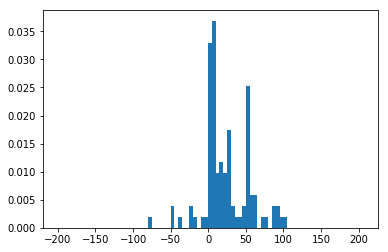

In [19]:
dy = top_model.predict(xTrain) - yTrain.ravel()
vals, bins = np.histogram(dy, bins=get_bins(is_symmetric=True, is_histogram=True), density=True)


_ = plt.hist(dy, density=True, bins=bins)

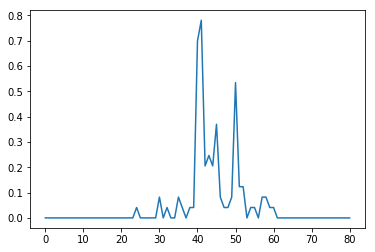

In [20]:
nvals = vals/vals.max() * (1 - 0.22)

plt.plot(nvals, )

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05263158 0.         0.         0.         0.         0.
 0.10526316 0.         0.05263158 0.         0.         0.10526316
 0.05263158 0.         0.05263158 0.05263158 0.89473684 1.
 0.26315789 0.31578947 0.26315789 0.47368421 0.10526316 0.05263158
 0.05263158 0.10526316 0.68421053 0.15789474 0.15789474 0.
 0.05263158 0.05263158 0.         0.10526316 0.10526316 0.05263158
 0.05263158 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


(17, 19)

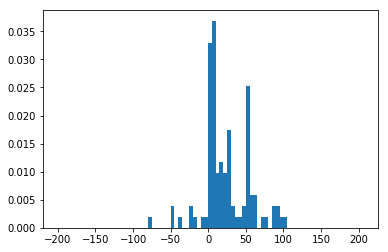

In [21]:
dy = top_model.predict(xTrain) - yTrain.ravel()
vals, bins = np.histogram(dy, bins=get_bins(is_symmetric=True, is_histogram=True), density=False)

print(vals / vals.max())

_ = plt.hist(dy, density=True, bins=bins)
(dy==0).sum(), vals.max()

In [22]:
vals.shape

(81,)